# **Developing an ARL Based Recommender System using the Dataset Online Retail II**

# Business Problem
### The cart information of 3 different users is given below. Let's make the most suitable product recommendation for this basket information by using the association rule. Product recommendations can be 1 or more than 1. Let's derive the decision rules from the 2010-2011 Germany customers.

* The id of the product found in User 1's cart: 21987
* The id of the product in User 2's cart: 23235
* The id of the product in User 3's cart: 22747

# Dataset story
### The dataset named Online Retail includes online sales transactions of a UK-based retail company between 01/12/2009 and 09/12/2011. The company's product catalog includes souvenirs and it is known that most of its customers are wholesalers.

* InvoiceNo: Invoice Number (If this code starts with C, it means that the transaction has been cancelled)
* StockCode: Product code (unique for each product)
* Description: Product name
* Quantity: Number of products (How many of the products on the invoices were sold)
* InvoiceDate: Invoice date
* UnitPrice: Invoice price ( Sterling )
* CustomerID: Unique customer number
* Country: Country name

# Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from mlxtend.frequent_patterns import apriori, association_rules
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 5000)
pd.set_option('display.expand_frame_repr', False)

# Data prreparation

### Let's read the 2010-2011 sheet from the Online Retail II dataset

In [2]:
df_ = pd.read_excel('/kaggle/input/online-retail-dataset/online_retail_II.xlsx', sheet_name='Year 2010-2011')

In [3]:
df = df_.copy()
df.columns = [col.lower() for col in df.columns]
df

,invoice,stockcode,description,quantity,invoicedate,price,customer id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


### Let's drop the observation units whose StockCode is POST (POST price added to each invoice does not represent the product)

In [4]:
df = df[~df['stockcode'].str.contains('POST', na=False)]
df

,invoice,stockcode,description,quantity,invoicedate,price,customer id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


### So, the number of obsevations reduced from 541910 to 540653 rows

### Let's drop the observation units with null values

In [5]:
df.isnull().sum() # check the null values
df = df.dropna()  # remove null values
df

,invoice,stockcode,description,quantity,invoicedate,price,customer id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


### Thus, the number of obsevations reduced from 540653 to 405633 rows

### Let's remove the values with C in Invoice from the data set (C means the cancellation of the invoice)

In [6]:
df = df[~df['invoice'].str.contains('C', na=False)]
df

,invoice,stockcode,description,quantity,invoicedate,price,customer id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


### After removing the observation including C, the number of obsevations was 396825 rows

### Let's filter out the observation units whose price and quantity values are less than zero.

In [7]:
df = df[df['price'] > 0]
df = df[df['quantity'] > 0]
df

,invoice,stockcode,description,quantity,invoicedate,price,customer id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


### After this process, the number of observations reduced to 396785 rows

### Let's examine the outliers of the Price and Quantity variables and suppress them if necessary.

In [8]:
df.describe([0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).T

,count,mean,std,min,5%,10%,25%,50%,75%,90%,95%,99%,max
quantity,396785.0,13.016349,179.579125,1.000,1.00,1.00,2.00,6.00,12.00,24.00,36.0,120.00,80995.00
price,396785.0,3.037677,17.829741,0.001,0.42,0.55,1.25,1.95,3.75,6.25,8.5,12.75,4161.06
customer id,396785.0,15301.463886,1709.852311,12346.000,12637.00,12916.00,13975.00,15159.00,16801.00,17725.00,17913.0,18212.00,18287.00


### As you see, there is a huge difference between 99% quantile and max values. Therefore, we can remove some outliers from the dataset. Let's show them via a box plot

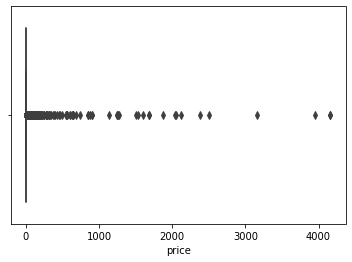

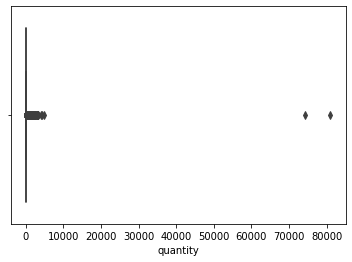

In [9]:
def check_outliers(dataframe, variable):
    sns.boxplot(dataframe[variable])
    plt.show()

columns = ['price', 'quantity']
for col in columns:
    check_outliers(df, col)

### Now, let's determine thresholds for the outliers

In [10]:
def outlier_thresholds(dataframe, variable, q1=0.01, q3=0.99):
    quartile1 = dataframe[variable].quantile(q1)
    quartile3 = dataframe[variable].quantile(q3)
    iqr = quartile3 - quartile1
    low_level = quartile1 - 1.5 * iqr
    high_level = quartile3 + 1.5 * iqr
    return low_level, high_level

### After determining the thresholds, let's replace the outliers with thresholds using the following function

In [11]:
def replace_with_thresholds(dataframe, variable):
    low_level, high_level = outlier_thresholds(dataframe, variable)
    dataframe.loc[dataframe[variable] < low_level, variable] = low_level
    dataframe.loc[dataframe[variable] > high_level, variable] = high_level

columns = ['price', 'quantity']
for col in columns:
    replace_with_thresholds(df, col)

### Now, let's check again the outliers

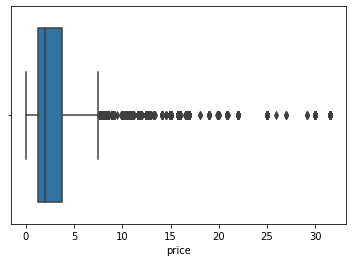

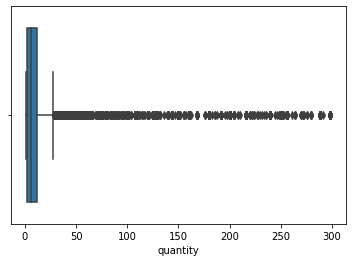

In [12]:
columns = ['price', 'quantity']
for col in columns:
    check_outliers(df, col)

### As you see, a significant part of the outliers was removed from the dataset. Let's check again the dataframe's descriptive statistics

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity,396785.0,11.855703,25.553760,1.000,2.00,6.00,12.00,298.50
price,396785.0,2.835605,2.982371,0.001,1.25,1.95,3.75,31.56
customer id,396785.0,15301.463886,1709.852311,12346.000,13975.00,15159.00,16801.00,18287.00


### Although there is still outliers in the dataframe, we replaced the significant part of them with thresholds of outliers

# Let's Create Association Rules Through German Customers

### Let's select the German customers

In [14]:
df_ger = df[df['country'] == 'Germany']
df_ger

,invoice,stockcode,description,quantity,invoicedate,price,customer id,country
1109,536527,22809,SET OF 6 T-LIGHTS SANTA,6.0,2010-12-01 13:04:00,2.95,12662.0,Germany
1110,536527,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6.0,2010-12-01 13:04:00,2.55,12662.0,Germany
1111,536527,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,12.0,2010-12-01 13:04:00,0.85,12662.0,Germany
1112,536527,22242,5 HOOK HANGER MAGIC TOADSTOOL,12.0,2010-12-01 13:04:00,1.65,12662.0,Germany
1113,536527,22244,3 HOOK HANGER MAGIC GARDEN,12.0,2010-12-01 13:04:00,1.95,12662.0,Germany
...,...,...,...,...,...,...,...,...
541801,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12.0,2011-12-09 12:16:00,1.25,12713.0,Germany
541802,581578,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12.0,2011-12-09 12:16:00,0.85,12713.0,Germany
541803,581578,22908,PACK OF 20 NAPKINS RED APPLES,12.0,2011-12-09 12:16:00,0.85,12713.0,Germany
541804,581578,23215,JINGLE BELL HEART ANTIQUE SILVER,12.0,2011-12-09 12:16:00,2.08,12713.0,Germany


### Let's define the create_invoice_product_df function that will create the invoice product pivot table

In [15]:
def create_invoice_product_df(dataframe, id=False):
    if id:
        return dataframe.groupby(['invoice', 'stockcode'])['quantity'].sum().unstack().fillna(0).applymap(lambda x: 1 if x > 0 else 0)
    else:
        return dataframe.groupby(['invoice', 'description'])['quantity'].sum().unstack().fillna(0).applymap(lambda x: 1 if x > 0 else 0)

ger_invoice_product_df = create_invoice_product_df(df_ger)  # the dataframe is according to the variable description
ger_invoice_product_df

description   50'S CHRISTMAS GIFT BAG LARGE   DOLLY GIRL BEAKER   I LOVE LONDON MINI BACKPACK   RED SPOT GIFT BAG LARGE   SET 2 TEA TOWELS I LOVE LONDON    SPACEBOY BABY GIFT SET  10 COLOUR SPACEBOY PEN  12 COLOURED PARTY BALLOONS  12 IVORY ROSE PEG PLACE SETTINGS  12 MESSAGE CARDS WITH ENVELOPES  12 PENCIL SMALL TUBE WOODLAND  12 PENCILS SMALL TUBE RED RETROSPOT  12 PENCILS SMALL TUBE SKULL  12 PENCILS TALL TUBE POSY  12 PENCILS TALL TUBE RED RETROSPOT  12 PENCILS TALL TUBE SKULLS  12 PENCILS TALL TUBE WOODLAND  12 PINK HEN+CHICKS IN BASKET  12 RED ROSE PEG PLACE SETTINGS  16 PIECE CUTLERY SET PANTRY DESIGN  2 PICTURE BOOK EGGS EASTER BUNNY  2 PICTURE BOOK EGGS EASTER CHICKS  20 DOLLY PEGS RETROSPOT  200 BENDY SKULL STRAWS  200 RED + WHITE BENDY STRAWS  3 DRAWER ANTIQUE WHITE WOOD CABINET  3 HOOK HANGER MAGIC GARDEN  3 HOOK PHOTO SHELF ANTIQUE WHITE  3 PIECE SPACEBOY COOKIE CUTTER SET  3 RAFFIA RIBBONS 50'S CHRISTMAS   3 STRIPEY MICE FELTCRAFT  3 TIER CAKE TIN GREEN AND CREAM  3 TIER CAKE TIN RED AND CREAM  3 TIER SWEETHEART GARDEN SHELF  3 TRADITIONAl BISCUIT CUTTERS  SET  36 DOILIES DOLLY GIRL  36 FOIL HEART CAKE CASES  36 FOIL STAR CAKE CASES   36 PENCILS TUBE RED RETROSPOT  36 PENCILS TUBE SKULLS  36 PENCILS TUBE WOODLAND  3D CHRISTMAS STAMPS STICKERS   3D TRADITIONAL CHRISTMAS STICKERS  3D VINTAGE CHRISTMAS STICKERS   4 LAVENDER BOTANICAL DINNER CANDLES  4 TRADITIONAL SPINNING TOPS  5 HOOK HANGER MAGIC TOADSTOOL  5 HOOK HANGER RED MAGIC TOADSTOOL  50'S CHRISTMAS PAPER GIFT BAG  6 GIFT TAGS 50'S CHRISTMAS   6 GIFT TAGS VINTAGE CHRISTMAS   6 RIBBONS ELEGANT CHRISTMAS   6 RIBBONS EMPIRE    6 RIBBONS RUSTIC CHARM  6 RIBBONS SHIMMERING PINKS   60 CAKE CASES DOLLY GIRL DESIGN  60 CAKE CASES VINTAGE CHRISTMAS  60 TEATIME FAIRY CAKE CASES  72 SWEETHEART FAIRY CAKE CASES  ABC TREASURE BOOK BOX   ACRYLIC GEOMETRIC LAMP  ACRYLIC HANGING JEWEL,PINK  ADULT APRON APPLE DELIGHT  ADVENT CALENDAR GINGHAM SACK  AIRLINE BAG VINTAGE JET SET BROWN  AIRLINE BAG VINTAGE JET SET RED  AIRLINE BAG VINTAGE JET SET WHITE  AIRLINE BAG VINTAGE TOKYO 78  AIRLINE BAG VINTAGE WORLD CHAMPION   ALARM CLOCK BAKELIKE CHOCOLATE  ALARM CLOCK BAKELIKE GREEN  ALARM CLOCK BAKELIKE IVORY  ALARM CLOCK BAKELIKE ORANGE  ALARM CLOCK BAKELIKE PINK  ALARM CLOCK BAKELIKE RED   ALPHABET HEARTS STICKER SHEET  ALPHABET STENCIL CRAFT  ANGEL DECORATION PAINTED ZINC   ANIMAL STICKERS  ANT COPPER LIME BOUDICCA BRACELET  ANT COPPER PINK BOUDICCA BRACELET  ANT COPPER TURQ BOUDICCA BRACELET  ANTIQUE GLASS DRESSING TABLE POT  ANTIQUE GLASS PEDESTAL BOWL  ANTIQUE SILVER T-LIGHT GLASS  APOTHECARY MEASURING JAR  APPLE BATH SPONGE  APRON APPLE DELIGHT  AREA PATROLLED METAL SIGN  ASS FLORAL PRINT MULTI SCREWDRIVER  ASSORTED BOTTLE TOP  MAGNETS   ASSORTED COLOUR BIRD ORNAMENT  ASSORTED COLOUR LIZARD SUCTION HOOK  ASSORTED COLOUR MINI CASES  ASSORTED COLOUR T-LIGHT HOLDER  ASSORTED COLOURS SILK FAN  ASSORTED EASTER DECORATIONS  BELLS  ASSORTED EASTER GIFT TAGS  ASSORTED FLOWER COLOUR "LEIS"  ASSORTED MONKEY SUCTION CUP HOOK  ASSORTED TUTTI FRUTTI BRACELET  ASSORTED TUTTI FRUTTI PEN  ASSTD DESIGN 3D PAPER STICKERS  ASSTD DESIGN RACING CAR PEN  ASSTD FRUIT+FLOWERS FRIDGE MAGNETS  BABUSHKA LIGHTS STRING OF 10  BABY BOOM RIBBONS   BAG 125g SWIRLY MARBLES  BAG 250g SWIRLY MARBLES  BAG 500g SWIRLY MARBLES  BAKING MOULD CHOCOLATE CUPCAKES  BAKING MOULD EASTER EGG WHITE CHOC  BAKING MOULD HEART MILK CHOCOLATE  BAKING MOULD HEART WHITE CHOCOLATE  BAKING MOULD ROSE MILK CHOCOLATE  BAKING MOULD ROSE WHITE CHOCOLATE  BAKING MOULD TOFFEE CUP CHOCOLATE  BAKING SET 9 PIECE RETROSPOT   BAKING SET SPACEBOY DESIGN  BALLOON ART MAKE YOUR OWN FLOWERS  BALLOON PUMP WITH 10 BALLOONS  BALLOON WATER BOMB PACK OF 35  BALLOONS  WRITING SET   BANQUET BIRTHDAY  CARD    BASKET OF TOADSTOOLS  BATH BUILDING BLOCK WORD  BATHROOM METAL SIGN  BEACH HUT SHELF W 3 DRAWERS  BEADED CHANDELIER T-LIGHT HOLDER  BEADED CRYSTAL HEART GREEN LARGE  BELLE JARDINIERE CUSHION COVER  BEWARE OF THE CAT METAL SIGN   BICYCLE PUNCTURE REPA

In [16]:
ger_invoice_product_df = create_invoice_product_df(df_ger, id=True) # the dataset is according to th variable stoccode
ger_invoice_product_df

stockcode  10002  10125  10135  11001  15034  15036  15039  16008  16011  16014  16016  16045  16054  16218  16235  16236  16237  16238  16259  17003  20652  20658  20665  20668  20674  20675  20676  20677  20679  20681  20682  20684  20685  20696  20702  20704  20705  20707  20711  20712  20713  20716  20717  20718  20719  20723  20724  20725  20726  20727  20728  20749  20750  20751  20752  20754  20755  20761  20766  20767  20772  20774  20794  20796  20828  20846  20897  20902  20903  20914  20961  20963  20971  20972  20973  20974  20975  20977  20978  20979  20981  20982  20983  20984  20992  20997  20998  21002  21014  21015  21025  21034  21035  21039  21041  21042  21051  21054  21055  21056  21058  21059  21061  21062  21068  21078  21080  21084  21086  21088  21090  21094  21096  21108  21110  21114  21115  21116  21121  21122  21123  21124  21125  21126  21128  21135  21136  21137  21154  21155  21156  21158  21159  21164  21165  21169  21175  21194  21196  21197  21202  21204  21205  21206  21207  21208  21209  21210  21211  21212  21213  21215  21216  21217  21218  21219  21220  21221  21224  21226  21231  21232  21238  21239  21240  21242  21243  21244  21245  21246  21249  21250  21251  21257  21258  21259  21262  21264  21272  21277  21284  21289  21291  21292  21293  21311  21314  21318  21320  21328  21329  21340  21354  21355  21358  21360  21371  21374  21380  21381  21383  21389  21392  21394  21395  21397  21398  21399  21401  21402  21403  21408  21411  21415  21424  21426  21427  21428  21429  21430  21439  21441  21446  21447  21452  21456  21458  21462  21467  21471  21479  21481  21484  21485  21494  21495  21497  21498  21499  21500  21503  21504  21506  21507  21508  21509  21519  21523  21524  21527  21531  21533  21534  21535  21537  21539  21544  21555  21556  21558  21559  21561  21562  21563  21564  21576  21577  21578  21579  21580  21581  21588  21592  21615  21620  21621  21622  21624  21625  21628  21642  21650  21656  21658  21666  21668  21669  21670  21671  21672  21673  21675  21679  21680  21682  21683  21698  21700  21703  21704  21705  21706  21707  21708  21710  21715  21716  21718  21719  21723  21724  21731  21735  21739  21741  21746  21747  21749  21754  21755  21756  21770  21773  21774  21775  21786  21787  21788  21789  21791  21809  21811  21817  21826  21828  21829  21832  21843  21844  21871  21873  21874  21877  21878  21880  21881  21882  21883  21884  21889  21890  21891  21892  21894  21896  21899  21903  21905  21906  21907  21908  21914  21915  21916  21917  21918  21925  21926  21927  21928  21929  21930  21931  21932  21933  21934  21935  21936  21937  21944  21948  21949  21955  21967  21972  21973  21974  21975  21976  21977  21980  21981  21982  21983  21984  21985  21986  21987  21988  21989  21990  21991  21992  21993  22021  22024  22025  22026  22027  22028  22029  22030  22031  22032  22035  22037  22040  22041  22042  22044  22045  22046  22047  22048  22049  22050  22051  22055  22057  22059  22060  22061  22062  22063  22064  22066  22067  22070  22072  22073  22074  22075  22076  22077  22078  22079  22080  22081  22082  22083  22085  22086  22087  22088  22089  22090  22091  22093  22094  22097  22098  22099  22100  22110  22111  22112  22113  22114  22117  22119  22123  22124  22128  22129  22130  22131  22134  22135  22138  22139  22141  22142  22144  22147  22148  22149  22150  22151  22163  22164  22168  22169  22171  22173  22174  22175  22176  22178  22179  22180  22181  22186  22187  22189  22190  22191  22192  22193  22195  22196  22197  22199  22200  22201  22202  22203  22204  22207  22208  22209  22210  22211  22212  22215  22220  22221  22222  22223  22228  22230  22231  22232  22233  22236  22242  22243  22244  22245  22246  22247  22252  22254  22255  22258  22260  22262  22263  22264  22271  22272  22273  22274  22276  22277  22278  22279  22280  22281  22296  22300  22301  22302  22303  22304  22307  22311  22315  22316  22317  22318 

### Let's define the create_rules function that will create the rules and find the rules for german customers

In [17]:
def create_rules(dataframe, id=True, country='Germany'):
    dataframe = dataframe[dataframe['country'] == country]
    dataframe = create_invoice_product_df(dataframe, id)
    frequent_items = apriori(dataframe, min_support=0.01, use_colnames=True)
    rules = association_rules(frequent_items, metric='support', min_threshold=0.01)
    return rules

rules = create_rules(df_ger)
rules

/opt/conda/lib/python3.7/site-packages/mlxtend/frequent_patterns/fpcommon.py:115: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(16237),(22326),0.011136,0.249443,0.011136,1.000000,4.008929,0.008358,inf
1,(22326),(16237),0.249443,0.011136,0.011136,0.044643,4.008929,0.008358,1.035073
2,(20674),(20675),0.022272,0.033408,0.013363,0.600000,17.960000,0.012619,2.416481
3,(20675),(20674),0.033408,0.022272,0.013363,0.400000,17.960000,0.012619,1.629547
4,(20674),(20676),0.022272,0.037862,0.011136,0.500000,13.205882,0.010293,1.924276
...,...,...,...,...,...,...,...,...,...
18365,(22629),"(22467, 22326, 22423, 21915, 22077)",0.104677,0.011136,0.011136,0.106383,9.553191,0.009970,1.106586
18366,(22326),"(22467, 22629, 22423, 21915, 22077)",0.249443,0.011136,0.011136,0.044643,4.008929,0.008358,1.035073
18367,(22423),"(22467, 22629, 22326, 21915, 22077)",0.140312,0.011136,0.011136,0.079365,7.126984,0.009573,1.074111
18368,(21915),"(22467, 22629, 22326, 22423, 22077)",0.046771,0.011136,0.011136,0.238095,21.380952,0.010615,1.297884


### Now, we have the support, confidence, and lift values regarding the association rules learning.

# Let's Make Product Suggestions to Users Given the Product IDs in the Basket

In [18]:
product_ids = {'user_1_product_id': 21987, 'user_2_product_id': 23235, 'user_3_product_id': 22747}

### Let's find the names of the given products using the check_id function that we will define

In [19]:
def check_id(dataframe, stock_code):
    product_name = dataframe[dataframe['stockcode'] == stock_code][['description']].values[0].tolist()
    print(product_name)

In [20]:
for k, v in product_ids.items():
    print('\n############################')
    print(f'For {k}, the recommended product is as follows:'), check_id(df, v)


############################
For user_1_product_id, the recommended product is as follows:
['PACK OF 6 SKULL PAPER CUPS']

############################
For user_2_product_id, the recommended product is as follows:
['STORAGE TIN VINTAGE LEAF']

############################
For user_3_product_id, the recommended product is as follows:
["POPPY'S PLAYHOUSE BATHROOM"]


### Let's recommend a product for 3 users using the arl_recommender function to be defined

In [21]:
def arl_recommender(rules_df, product_id, recommend_count=1):
    sorted_rules = rules_df.sort_values('lift', ascending=False)
    recommendation_list = []
    for i, product in enumerate(sorted_rules['antecedents']):
        for j in list(product):
            if j == product_id:
                recommendation_list.append(list(sorted_rules.iloc[i]['consequents'])[0])
    return recommendation_list[0: recommend_count]

In [22]:
for k, v in product_ids.items():
    if product_ids[k] == v:
        print(f'The product ids to be recommended for {k} are {arl_recommender(rules, v, recommend_count=1)}')

The product ids to be recommended for user_1_product_id are [21989]
The product ids to be recommended for user_2_product_id are [23243]
The product ids to be recommended for user_3_product_id are [22746]


### Let's look at the names of the products to be recommended

In [23]:
recommended_ids = {'recommended_user_1_product_id': [21989],
                   'recommended_user_2_product_id': [23244],
                   'recommended_user_3_product_id': [22746]}

In [24]:
def check_product(dataframe, user_product_id):
    for i in user_product_id:
        check_id(dataframe, i)

In [25]:
for k, v in recommended_ids.items():
    print(f'\n################ {k} ###################')
    check_product(df_ger, v)


################ recommended_user_1_product_id ###################
['PACK OF 20 SKULL PAPER NAPKINS']

################ recommended_user_2_product_id ###################
['ROUND STORAGE TIN VINTAGE LEAF']

################ recommended_user_3_product_id ###################
["POPPY'S PLAYHOUSE LIVINGROOM "]


### Consequently, we recommended successfully a product for 3 users and determined what the recommended product name is.

# Thanks for checking my notebook!